# Feature selection

## Feature selectionの目的

- 次元の呪い回避
    * 計算コスト
    * データの解釈性
    * Over fitting


## Feature selectionの ポイント

* どこからが多いかと言う定義は無い
* それぞれのモデルに合わせて適切な検証を行い選択する

## Feature selectionの種類と特徴

|Feature selection|速度|精度|
|:-:|:-:|:-:|
|フィルタ法|◎|△|
|ラッパー法|△|◎|
|埋め込み法|◯|◯|

*　<a href="https://www.jmlr.org/papers/v3/guyon03a.html" title="" target="_blank">An Introduction to Variable and Feature Selection</a>

## フィルタ法

### 分散の低い特徴削除 

分散が0.1未満(threshold=0.1)のすべての列を削除

```python
from sklearn.feature_selection import VarianceThreshold

data = ...

var_thresh = VarianceThreshold(threshold=0.1)
transformed_data = var_thresh.fit_transform(data)
# transformed data will have all columns with variance less
# than 0.1 removed
```

### 相関の高い特徴を削除

* ピアソンの相関を利用して相関の高い特徴の1つを削除

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# fetch a regression dataset
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# convert to pandas dataframe
df = pd.DataFrame(X, columns=col_names)

# introduce a highly correlated column
# 相関の高い列データを意図的に作成
df.loc[:, "MedInc_Sqrt"] = df['MedInc'].apply(np.sqrt)

# get correlation matrix (pearson)
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


In [2]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.0000,-0.1190,0.3269,-0.0620,0.0048,0.0188,-0.0798,-0.0152,0.9843
HouseAge,-0.1190,1.0000,-0.1533,-0.0777,-0.2962,0.0132,0.0112,-0.1082,-0.1328
AveRooms,0.3269,-0.1533,1.0000,0.8476,-0.0722,-0.0049,0.1064,-0.0275,0.3267
AveBedrms,-0.0620,-0.0777,0.8476,1.0000,-0.0662,-0.0062,0.0697,0.0133,-0.0669
Population,0.0048,-0.2962,-0.0722,-0.0662,1.0000,0.0699,-0.1088,0.0998,0.0184
AveOccup,0.0188,0.0132,-0.0049,-0.0062,0.0699,1.0000,0.0024,0.0025,0.0153
Latitude,-0.0798,0.0112,0.1064,0.0697,-0.1088,0.0024,1.0000,-0.9247,-0.0843
Longitude,-0.0152,-0.1082,-0.0275,0.0133,0.0998,0.0025,-0.9247,1.0000,-0.0156
MedInc_Sqrt,0.9843,-0.1328,0.3267,-0.0669,0.0184,0.0153,-0.0843,-0.0156,1.0000


MedInc_SqrtはMedIncと非常に高い相関があるので削除できると判断

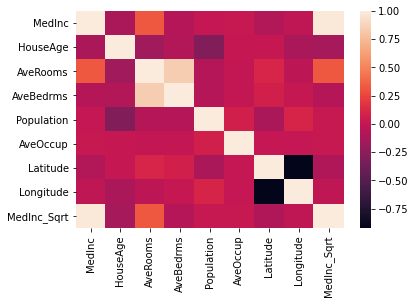

In [3]:
import seaborn as sns
sns.heatmap(df.corr())

### Univariate feature selection (単変量統計による特徴量選択)

単変量統計とは、個々の特徴量とターゲットとの間に統計的に顕著な関係があるかどうかを計算し、  
最も高い確信度で関連している特徴量を選択する戦略

#### メリット

* モデルの構築が不要
* 高速に処理できる

#### デメリット

* 他の特徴量との組み合わせで意味を持つような特徴量が捨てられてしまう可能性がある

#### selection（n_features）

* float : SelectPercentile : スコアリングが指定したパーセンテージ上位の特徴を選択
* int : SelectKBest : トップK個の特徴を選択

#### scoring

* Mutual information : 相互情報量を推定
* ANOVA : Analysis of variance 分散分析
* F-test : F値
* chi2 : カイ二乗統計量

##### Task type : classification

* f_classif : 提供されたサンプルのANOVA F値を計算
* chi2 : 各非負の特徴とターゲットクラスの間のカイ二乗統計量を計算  
    自然界では非負であるデータに対してのみ使用できる (特に自然言語処理においてBoWやTF-IDFに有効的)
* mutual_info_classif : 離散ターゲット変数の相互情報量を推定

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html" title="sklearn.feature_selection.f_classif — scikit-learn 0.23.2 documentation" target="_blank">sklearn.feature_selection.f_classif — scikit-learn 0.23.2 documentation</a>
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html" title="sklearn.feature_selection.chi2 — scikit-learn 0.23.2 documentation" target="_blank">sklearn.feature_selection.chi2 — scikit-learn 0.23.2 documentation</a>
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html" title="sklearn.feature_selection.mutual_info_classif — scikit-learn 0.23.2 documentation" target="_blank">sklearn.feature_selection.mutual_info_classif — scikit-learn 0.23.2 documentation</a>

##### Task type : regression
* f_regression : 単変量線形回帰テスト
* mutual_info_regression : 連続ターゲット変数の相互情報量を推定

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html" title="sklearn.feature_selection.f_regression — scikit-learn 0.23.2 documentation" target="_blank">sklearn.feature_selection.f_regression — scikit-learn 0.23.2 documentation</a>
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html" title="sklearn.feature_selection.mutual_info_regression — scikit-learn 0.23.2 documentation" target="_blank">sklearn.feature_selection.mutual_info_regression — scikit-learn 0.23.2 documentation</a>

In [4]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

class UnivariateFeatureSelction:
    def __init__(self, n_features, problem_type, scoring):
        """
        Custom univariate feature selection wrapper on
        different univariate feature selection models from
        scikit-learn.
        :param n_features: SelectPercentile if float else SelectKBest
        :param problem_type: classification or regression
        :param scoring: scoring function, string
        """
        # for a given problem type, there are only
        # a few valid scoring methods
        # you can extend this with your own custom
        # methods if you wish
        if problem_type == "classification":
            valid_scoring = {
                "f_classif": f_classif,
                "chi2": chi2,
                "mutual_info_classif": mutual_info_classif
            }
        else:
            valid_scoring = {
                "f_regression": f_regression,
                "mutual_info_regression": mutual_info_regression
            }

        # raise exception if we do not have a valid scoring method
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")

        # if n_features is int, we use selectkbest
        # if n_features is float, we use selectpercentile
        # please note that it is int in both cases in sklearn
        if isinstance(n_features, int):
                self.selection = SelectKBest(
                valid_scoring[scoring],
                k=n_features
            )
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(
                valid_scoring[scoring],
                percentile=int(n_features * 100)
            )
        else:
            raise Exception("Invalid type of feature")

    # same fit function
    def fit(self, X, y):
        return self.selection.fit(X, y)

    # same transform function
    def transform(self, X):
        return self.selection.transform(X)

    # same fit_transform function
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)

In [5]:
ufs = UnivariateFeatureSelction(
    n_features=0.1,
    problem_type="regression",
    scoring="f_regression"
)
ufs.fit(X, y)
X_transformed = ufs.transform(X)

Please note that it’s usually better to create less and important features than to create hundreds of features in the first place.

通常は、最初に何百もの特徴を作成するよりも、少なく重要な特徴を作成する方が良いことに注意してください。

特徴エンジニアリングより特徴選択を優先すべき？

## ラッパー法

### greedy feature selection (貪欲特徴選択)

1. 学習モデルの選択
2. 損失/評価関数の選択
3. それぞれの特徴で反復的に学習を行い結果の良かった特徴をリストアップ

#### 戦略
1. 特徴を1つずつ学習し1番スコアの良いものを抽出
2. 1.で抽出した特徴+1特徴を学習し1番スコアの良いものを追加抽出
3. 繰り返し
4. スコアが下がってしまったところで打ち切り

#### デメリット
* 計算コストが高い
* このタイプの特徴選択は適切に利用しないとオーバーフィッティングしやすい？

In [6]:
# greedy.py 
import pandas as pd 
 
from sklearn import linear_model 
from sklearn import metrics 
from sklearn.datasets import make_classification 
 
 
class GreedyFeatureSelection:     
    """ 
    A simple and custom class for greedy feature selection. 
    You will need to modify it quite a bit to make it suitable 
    for your dataset. 
    """ 
    def evaluate_score(self, X, y): 
        """ 
        This function evaluates model on data and returns 
        Area Under ROC Curve (AUC) 
        NOTE: We fit the data and calculate AUC on same data. 
        WE ARE OVERFITTING HERE.  
        But this is also a way to achieve greedy selection. 
        k-fold will take k times longer. 
 
        If you want to implement it in really correct way, 
        calculate OOF AUC and return mean AUC over k folds. 
        This requires only a few lines of change and has been  
        shown a few times in this book. 
 
        :param X: training data 
        :param y: targets 
        :return: overfitted area under the roc curve 
        """ 
        # fit the logistic regression model, 
        # and calculate AUC on same data 
        # again: BEWARE 
        # you can choose any model that suits your data 
        model = linear_model.LogisticRegression() 
        model.fit(X, y) 
        predictions = model.predict_proba(X)[:, 1] 
        auc = metrics.roc_auc_score(y, predictions) 
        return auc 
     
    def _feature_selection(self, X, y): 
        """ 
        This function does the actual greedy selection 
        :param X: data, numpy array 
        :param y: targets, numpy array 
        :return: (best scores, best features) 
        """ 
        # initialize good features list  
        # and best scores to keep track of both 
        good_features = [] 
        best_scores = [] 
         
        # calculate the number of features 
        num_features = X.shape[1] 
         
        # infinite loop 
        while True: 
            # initialize best feature and score of this loop 
            this_feature = None 
            best_score = 0 
 
            # loop over all features 
            for feature in range(num_features): 
                # if feature is already in good features, 
                # skip this for loop 
                if feature in good_features: 
                    continue 
                # selected features are all good features till now 
                # and current feature 
                selected_features = good_features + [feature] 
                # remove all other features from data 
                xtrain = X[:, selected_features] 
                # calculate the score, in our case, AUC 
                score = self.evaluate_score(xtrain, y) 
                # if score is greater than the best score 
                # of this loop, change best score and best feature 
                if score > best_score: 
                    this_feature = feature 
                    best_score = score 
 
            # if we have selected a feature, add it 
            # to the good feature list and update best scores list 
            if this_feature != None: 
                good_features.append(this_feature) 
                best_scores.append(best_score) 
 
            # if we didnt improve during the last two rounds, 
            # exit the while loop 
            if len(best_scores) > 2: 
                if best_scores[-1] < best_scores[-2]: 
                    break 
        # return best scores and good features 
        # why do we remove the last data point? 
        return best_scores[:-1], good_features[:-1] 
 
    def __call__(self, X, y): 
        """ 
        Call function will call the class on a set of arguments 
        """ 
        # select features, return scores and selected indices 
        scores, features = self._feature_selection(X, y) 
        # transform data with selected features 
        return X[:, features], scores 
 
if __name__ == "__main__": 
    # generate binary classification data 
    X, y = make_classification(n_samples=1000, n_features=100) 
 
    # transform data by greedy feature selection 
    X_transformed, scores = GreedyFeatureSelection()(X, y) 

In [7]:
pd.DataFrame(X_transformed)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
0,0.570053,-0.974490,0.581307,-0.239303,0.351841,0.472778,-0.558690,0.419943,-0.561477,0.320204,0.147626,-1.842219,-0.686574,0.450619,-1.485886,-0.063398,0.475586,0.247341,1.227378,-0.727624,-0.436547,-1.474637,-0.247541,-0.207694,1.771995,-0.539829,-0.864156,0.597161,-1.006795,0.102035,-1.055670,-0.623193,1.538604,0.241143,0.328015,-1.710953,0.694173,0.017478,-0.991144,0.847469,0.814445,-0.987612,0.259004,0.136560,0.605357,0.341072,-1.452700,1.440091,-1.075527,0.788532,0.322032,-0.051657,0.193296,0.918748,-1.296381,0.079678,0.136418,0.581644,0.634796,0.348232,-1.442282,-2.204681,0.809213,-0.678212,-0.749287,-2.116854,0.439115
1,-1.013636,1.287773,1.562174,-0.493217,-0.362991,-1.080668,0.702903,1.981655,-0.598435,0.568070,0.301555,-0.887509,-1.273655,-0.176663,0.047029,1.749752,-0.186587,1.433055,2.206624,1.332924,-0.805604,-1.100895,-1.705090,0.276270,0.058454,-0.548985,-0.883660,0.186900,-0.599342,-0.437821,-0.980965,2.065992,0.066458,-0.772668,-1.054031,0.680686,1.981384,0.157020,-0.637369,-1.167494,-1.295328,-0.336308,-1.221862,1.519885,-1.067829,-0.204428,1.005444,0.493046,2.738242,0.733615,0.421170,-0.022768,-0.668909,-0.369426,-0.653430,-0.555371,-0.087086,0.798372,0.872428,0.901288,0.522184,-1.989854,-0.108431,0.865903,-0.775762,0.013855,-0.616798
2,-0.670488,0.831202,2.032207,1.257193,-1.623490,0.442986,-0.020819,0.515282,-0.128630,0.278709,0.788886,-0.815843,-0.552549,1.383269,1.075902,-2.082103,-0.454823,0.132684,0.755002,1.835059,-0.077936,0.771312,0.942072,-1.550559,0.108515,1.244839,0.518417,0.639222,-0.219062,1.421931,0.317493,-1.440704,0.329909,-0.244571,-0.490336,1.640174,-0.279620,0.502574,0.990008,0.994496,-1.078128,-2.157362,-1.421961,-0.624331,-0.705938,-0.113904,1.325293,0.060617,0.682629,0.010421,0.098580,0.134302,-1.055892,0.218519,1.295307,-1.482600,1.192421,-0.592961,-1.367751,-0.465664,-2.152184,-1.149428,0.412335,-0.782324,-1.607650,-0.143116,-1.791678
3,0.376019,-1.940987,0.617536,-3.006299,-0.300680,0.258009,0.553835,-0.086727,1.221030,-0.565788,1.374060,1.957923,1.019649,1.298905,-0.285211,-1.496221,0.820359,0.542894,1.760127,-0.077801,0.111133,-0.388790,0.383974,-1.017336,-0.869414,2.275857,0.810789,0.556481,1.049250,2.427674,-0.148885,0.569690,-1.334676,-1.273911,-0.015981,-0.091873,0.501213,1.635998,0.014839,0.031847,1.838552,0.358557,1.043850,0.778410,0.424340,-1.106607,-1.123024,-0.192730,-0.015261,-0.388090,-2.017902,-0.003847,0.740955,-0.380506,2.049575,-1.253011,-0.642864,-1.291230,-0.066858,0.366379,0.539775,0.950742,1.275217,-0.964616,-0.095517,-0.963059,-0.068606
4,0.340931,-0.268447,-0.148364,0.343216,0.466809,0.385436,-0.064026,1.079246,0.679326,-1.575790,0.145553,2.209040,-0.425365,-0.029359,-0.784034,-1.120421,0.485685,-0.975056,0.483942,-0.944224,0.281999,-0.895794,0.142280,1.462649,0.447499,-0.885653,0.929601,1.918121,0.550746,1.493009,1.671790,-1.566242,-0.467090,-0.245837,-0.619912,2.062721,-1.058032,0.085786,-1.255639,1.826080,-1.028331,-1.264302,-0.003159,-0.557398,0.355982,0.721239,-0.980828,0.161278,0.577972,0.582837,-0.052926,-1.119040,0.097583,0.350430,-0.772314,-0.464790,0.754968,1.086581,0.858151,-1.399390,-0.644731,0.542912,-0.562666,-0.381331,0.319937,-0.399311,0.376743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.187762,0.189118,-1.843627,0.444369,0.387806,-0.888500,-0.128558,-0.806439,-0.743419,-0.260254,-0.333386,-1.236445,1.926000,-0.880851,-0.102079,1.099254,0.277761,-1.377819,-0.724946,0.802863,1.481637,-0.714691,0.497384,-0.327137,1.430821,-0.265223,0.141113,0.114715,-0.262382,1.480642,-0.545485,0.787134,0.875328,-0.247355,-0.684780,0.284120,-

100 → 61 削減

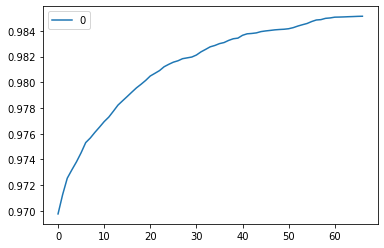

In [8]:
pd.DataFrame(scores).plot()

0.966　→ 0.980 上昇

### recursive feature elimination (RFE : 再帰的特徴量削減)

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html" title="sklearn.feature_selection.RFE — scikit-learn 0.23.2 documentation" target="_blank">sklearn.feature_selection.RFE — scikit-learn 0.23.2 documentation</a>
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html" title="sklearn.datasets.fetch_california_housing — scikit-learn 0.23.2 documentation" target="_blank">sklearn.datasets.fetch_california_housing — scikit-learn 0.23.2 documentation</a>

In [9]:
import pandas as pd 
 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import fetch_california_housing 
 
# fetch a regression dataset 
data = fetch_california_housing() 
X = data["data"] 
col_names = data["feature_names"] 
y = data["target"] 

# initialize the model 
model = LinearRegression() 
# initialize RFE 
rfe = RFE( 
    estimator=model, 
    n_features_to_select=3 
) 
 
# fit RFE 
rfe.fit(X, y) 
 
# get the transformed data with 
# selected columns 
X_transformed = rfe.transform(X) 

In [10]:
pd.DataFrame(X_transformed)

,0,1,2
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [11]:
pd.DataFrame(data=X, columns=col_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
rfe.ranking_

array([1, 4, 3, 2, 6, 5, 1, 1])

n_features_to_select=3 なのでランキング高い3つの抽出されている

#### カリフォルニアの住宅データセット

* (MedInc)median income in block-収入の中央値
* (HouseAge)median house age in block-ブロック内の家の中央年齢
* (AveRooms)average number of rooms-平均部屋数
* (AveBedrms)average number of bedrooms-ベッドルームの平均数
* (Population)block population-ブロック人口
* (AveOccup)average house occupancy-平均住宅占有率
* (Latitude)house block latitude-ハウスブロックの緯度
* (Longitude)house block longitude-ハウスブロックの経度



In [13]:
rfe.score(X, y)

0.5842592625783573

## 埋め込み法

### RandomForest

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html" title="sklearn.datasets.load_diabetes — scikit-learn 0.23.2 documentation" target="_blank">sklearn.datasets.load_diabetes — scikit-learn 0.23.2 documentation</a>
* 糖尿病の進行状況データセット

In [14]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

# fetch a regression dataset
# in diabetes data we predict diabetes progression
# after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# initialize the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### 特徴の重要度をプロット

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


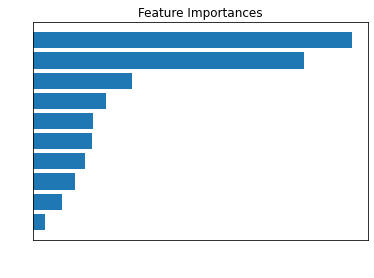

In [15]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')

dc = '#ffffff'
ax = plt.subplot(111)
# ax.spines['bottom'].set_color(dc)
ax.xaxis.label.set_color(dc)
ax.tick_params(axis='x', colors=dc)
ax.tick_params(axis='y', colors=dc)

plt.show()

### SelectFromModel + RandomForest

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html" title="sklearn.feature_selection.SelectFromModel — scikit-learn 0.23.2 documentation" target="_blank">sklearn.feature_selection.SelectFromModel — scikit-learn 0.23.2 documentation</a>

In [16]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# fetch a regression dataset
# in diabetes data we predict diabetes progression
# after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# initialize the model
model = RandomForestRegressor()

# select from the model
#  __init__(estimator, *, threshold=None, prefit=False, norm_order=1, max_features=None)
sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(X, y)

# see which features were selected
support = sfm.get_support()

# get feature names
print([
    x for x, y in zip(col_names, support) if y == True
])

['bmi', 's5']


### SelectFromModel + Lasso

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso" title="sklearn.linear_model.Lasso — scikit-learn 0.23.2 documentation" target="_blank">sklearn.linear_model.Lasso — scikit-learn 0.23.2 documentation</a>

In [17]:
from sklearn import linear_model

# initialize the model
model = linear_model.Lasso()

# select from the model
#  __init__(estimator, *, threshold=None, prefit=False, norm_order=1, max_features=None)
sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(X, y)

# see which features were selected
support = sfm.get_support()

# get feature names
print([
    x for x, y in zip(col_names, support) if y == True
])

['bmi', 'bp', 's5']


#### 特徴の係数(w)の大きさをプロット

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


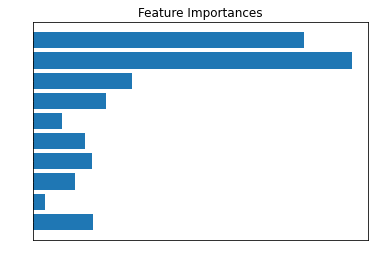

In [18]:
# initialize the model
model = linear_model.Lasso()

# fit the model
model.fit(X, y)

fer = model.coef_

idxs = np.argsort(fer)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')

dc = '#ffffff'
ax = plt.subplot(111)
# ax.spines['bottom'].set_color(dc)
ax.xaxis.label.set_color(dc)
ax.tick_params(axis='x', colors=dc)
ax.tick_params(axis='y', colors=dc)

plt.show()

### any more

* すべてのツリーベースのモデルは特徴重要度を提供する
* そのため、XGBoost、LightGBM、CatBoost等の高機能モデルも利用できる
* 基本的な使い方は同じ

## まとめ

学習データで特徴量を選択した後、検証データでモデルを検証することで、  
初めてモデルをオーバーフィットさせずに適切な特徴量が選択できることを忘れないようにしましょう。